# Arbre de décision

### Choix du modéle

### Importation des librairies

In [41]:
import numpy as np
import pandas as pd
import os
import sys
import pickle  
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc

### Importation du fichier des variables

In [3]:
with open('variables.pkl', 'rb') as f:
    (fold_indices, df, X_train, X_test, y_train, y_test,
                 X_train_1, Y_train_1, X_train_2, Y_train_2, 
                 X_train_3, Y_train_3, X_train_4, Y_train_4, 
                 X_train_5, Y_train_5,  
                 X_test_1, Y_test_1, X_test_2, Y_test_2, 
                 X_test_3, Y_test_3, X_test_4, Y_test_4,
                 X_test_5, Y_test_5, ) = pickle.load(f)

### Instantion, entrainement et évaluation


 Fold 1/5
 Précision : 0.50

 Fold 2/5
 Précision : 0.80

 Fold 3/5
 Précision : 1.00

 Fold 4/5
 Précision : 1.00

 Fold 5/5
 Précision : 0.70


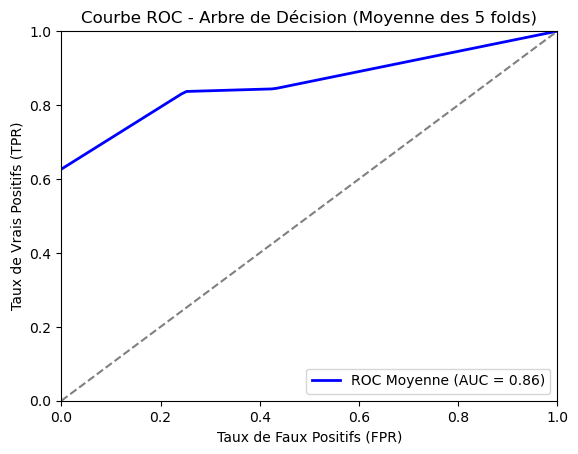


 Précision moyenne du modèle : 0.80


In [42]:
# Initialisation des listes pour stocker les résultats
accuracies = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Boucle sur les 5 ensembles (cross-validation déjà faite)
for i in range(1, 6):
    print(f"\n Fold {i}/5")

    # Sélection des ensembles d'entraînement et de test
    X_train_fold = locals()[f'X_train_{i}']
    y_train_fold = locals()[f'Y_train_{i}']
    X_test_fold = locals()[f'X_test_{i}']
    y_test_fold = locals()[f'Y_test_{i}']

    # Paramètres ajustés de l'Arbre de Décision
    model_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', random_state=42)
    model_tree.fit(X_train_fold, y_train_fold)

    # Prédictions
    y_pred = model_tree.predict(X_test_fold)
    y_prob = model_tree.predict_proba(X_test_fold)[:, 1]  # Probabilité de la classe positive

    # Évaluation
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)
    print(f" Précision : {accuracy:.2f}")

    # Courbe ROC pour ce fold
    fpr, tpr, _ = roc_curve(y_test_fold, y_prob)
    roc_auc = auc(fpr, tpr)

    # Interpolation pour calculer la courbe ROC moyenne
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    tprs.append(interp_tpr)

# Calcul de la moyenne des courbes ROC
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)


# Affichage de la précision moyenne
mean_accuracy = np.mean(accuracies)
print(f"\n Précision moyenne du modèle : {mean_accuracy:.2f}")

### Courbe ROC

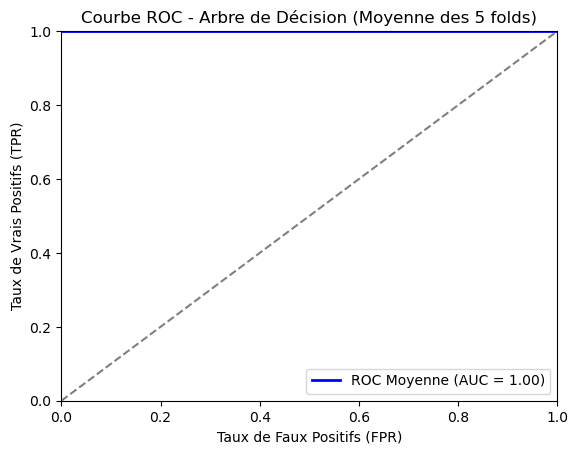

In [46]:
# Affichage de la courbe ROC moyenne
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC Moyenne (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Arbre de Décision (Moyenne des 5 folds)')
plt.legend(loc="lower right")
plt.show()


### Interpretation

In [23]:
#plt.figure(figsize=(12, 8))
#plot_tree(model_tree, class_names=["Pas de cancer", "Présence de cancer"], filled=True)
#plt.title("Arbre de Décision - Modèle Cancer")
#plt.show()

### Optimisation 

Meilleurs hyperparamètres :  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleure précision obtenue :  1.0

 Fold 1/5
🔹 Précision du fold 1: 1.00

 Fold 2/5
🔹 Précision du fold 2: 1.00

 Fold 3/5
🔹 Précision du fold 3: 1.00

 Fold 4/5
🔹 Précision du fold 4: 1.00

 Fold 5/5
🔹 Précision du fold 5: 1.00


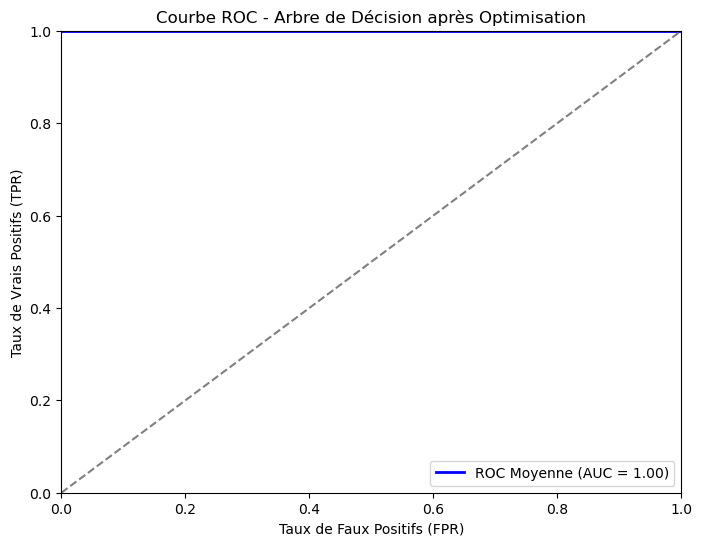


 Précision moyenne du modèle après optimisation : 1.00


In [48]:
# Convertir les tableaux numpy en DataFrame (pour X) et Series (pour y)
X_train_1 = pd.DataFrame(X_train_1)
X_train_2 = pd.DataFrame(X_train_2)
X_train_3 = pd.DataFrame(X_train_3)
X_train_4 = pd.DataFrame(X_train_4)
X_train_5 = pd.DataFrame(X_train_5)

Y_train_1 = pd.Series(Y_train_1)
Y_train_2 = pd.Series(Y_train_2)
Y_train_3 = pd.Series(Y_train_3)
Y_train_4 = pd.Series(Y_train_4)
Y_train_5 = pd.Series(Y_train_5)

# On combine toutes les données pour X et y
X = pd.concat([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5], axis=0)
y = pd.concat([Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5], axis=0)

# Définition de la grille d'hyperparamètres pour GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialisation du modèle de l'arbre de décision
model_tree = DecisionTreeClassifier(random_state=42)

# Initialisation de la validation croisée à 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Création de GridSearchCV avec 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_tree, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# Entraînement avec la validation croisée
grid_search.fit(X, y)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Affichage de la meilleure précision obtenue
print("Meilleure précision obtenue : ", grid_search.best_score_)

# Initialisation des variables pour stocker les résultats des 5 folds
accuracies = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []
mean_auc = 0

# Boucle sur les 5 folds pour calculer la précision et les courbes ROC
for fold, (train_index, test_index) in enumerate(cv.split(X, y), 1):
    print(f"\n Fold {fold}/5")
    
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Réentraîner le modèle avec les meilleurs hyperparamètres trouvés par GridSearchCV
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_fold, y_train_fold)
    
    # Prédictions
    y_pred = best_model.predict(X_test_fold)
    y_prob = best_model.predict_proba(X_test_fold)[:, 1]  # Probabilité de la classe positive
    
    # Calcul de la précision pour ce fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)
    print(f" Précision du fold {fold}: {accuracy:.2f}")
    
    # Courbe ROC pour ce fold
    fpr, tpr, _ = roc_curve(y_test_fold, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Interpolation pour calculer la courbe ROC moyenne
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    tprs.append(interp_tpr)
    mean_auc += roc_auc

# Calcul de la moyenne des courbes ROC et de la précision
mean_tpr = np.mean(tprs, axis=0)
mean_auc = mean_auc / 5
mean_accuracy = np.mean(accuracies)

# Affichage de la courbe ROC moyenne après optimisation
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC Moyenne (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Arbre de Décision après Optimisation')
plt.legend(loc="lower right")
plt.show()

# Affichage de la précision moyenne
print(f"\n Précision moyenne du modèle après optimisation : {mean_accuracy:.2f}")

### Interpretation

### Critiques